In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import r2_score
from sklearn import svm
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

In [2]:
data = pd.read_csv('employee_survey_data.csv') # читаем файл
data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [4]:
data_1 = pd.read_csv('general_data.csv')  # читаем файл
data_1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [6]:
data_2 = pd.read_csv('manager_survey_data.csv') # читаем файл
data_2.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [7]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [8]:
# соберем общий датасет из полученных данных
df = pd.merge(left=data_1, right=data[['EmployeeID', 'EnvironmentSatisfaction','JobSatisfaction', 'WorkLifeBalance']], how='inner', on='EmployeeID')
df = pd.merge(left=df, right=data_2[['EmployeeID', 'JobInvolvement', 'PerformanceRating']], how='inner', on='EmployeeID')

In [9]:
df.head() # смотрим 

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [11]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [12]:
#заполним пропущенные данные медианой 


df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].median(), inplace=True)
df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].median(), inplace=True)
df['EnvironmentSatisfaction'].fillna(df['EnvironmentSatisfaction'].median(), inplace=True)
df['JobSatisfaction'].fillna(df['JobSatisfaction'].median(), inplace=True)
df['WorkLifeBalance'].fillna(df['WorkLifeBalance'].median(), inplace=True)
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [14]:
#проверим уникальные значения признаков, которые имеют максимальную корреляцию с увольнением

df['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

In [15]:
df['Age'].value_counts()

35    234
34    231
36    207
31    207
29    204
32    183
30    180
38    174
33    174
40    171
37    150
28    144
27    144
42    138
39    126
45    123
41    120
26    117
46     99
44     99
43     96
50     90
24     78
25     78
47     72
49     72
55     66
53     57
51     57
48     57
54     54
52     54
22     48
23     42
58     42
56     42
21     39
20     33
59     30
19     27
18     24
60     15
57     12
Name: Age, dtype: int64

In [16]:
df['BusinessTravel'].value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64

In [17]:
df['Department'].value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

In [18]:
df['EducationField'].value_counts()

Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64

In [19]:
df['Gender'].value_counts()

Male      2646
Female    1764
Name: Gender, dtype: int64

In [20]:
df['JobRole'].value_counts()

Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64

In [21]:
df['MaritalStatus'].value_counts()

Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64

In [22]:


# df['TotalWorkingYears'].astype('int')
df['TotalWorkingYears'] = df['TotalWorkingYears'].astype('int')

In [23]:
def make_plot(feature_name):
    plt.figure(figsize = (18,7))
    ax = sns.countplot(x = feature_name, hue = 'Attrition', data = df, palette = 'Set2')
    plt.xlabel(feature_name,fontsize=10)
#     plt.xlabel( fontsize=18)
    plt.ylabel('Employee count')
    plt.title('{} vs Attrition'.format(feature_name))
    plt.legend()
    
#     plt.xlabel('xlabel', fontsize=18)

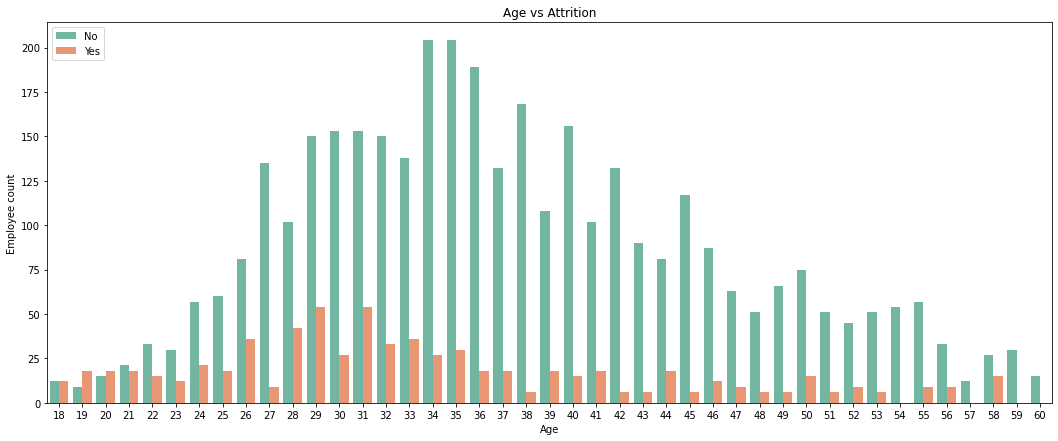

In [24]:
make_plot('Age')

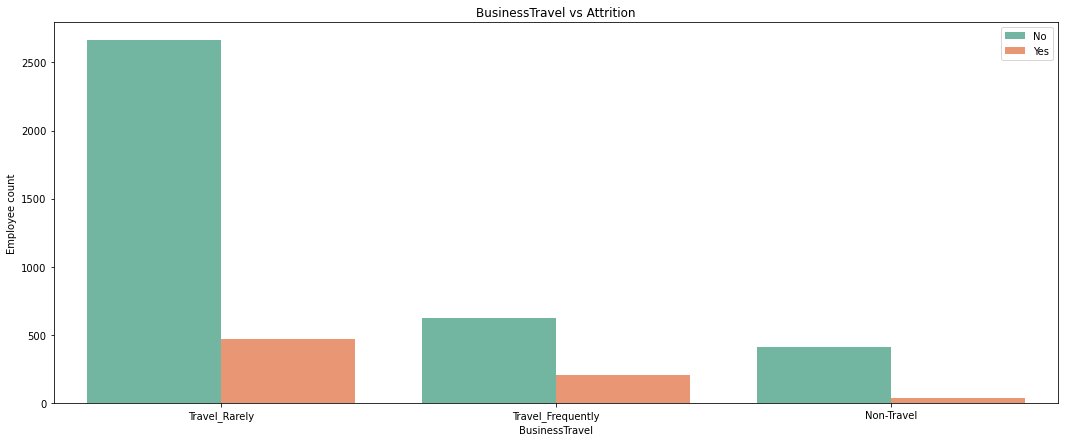

In [25]:
make_plot('BusinessTravel')

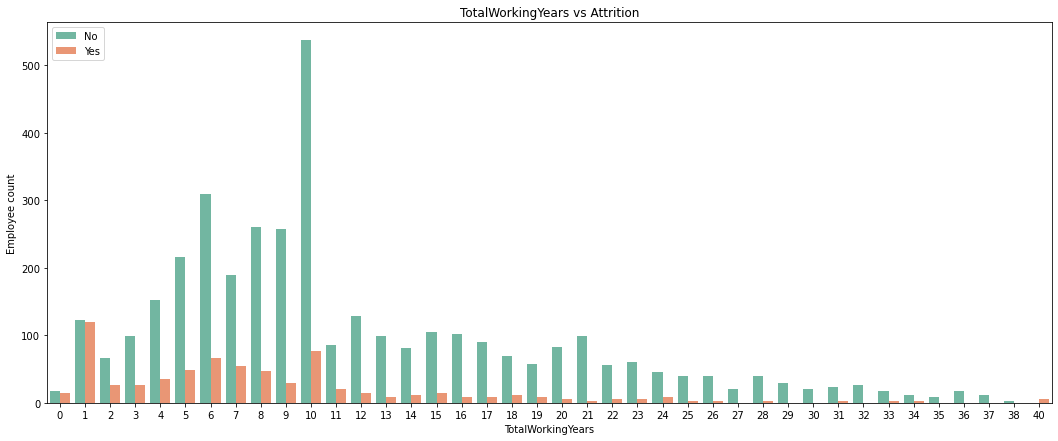

In [26]:
make_plot('TotalWorkingYears')

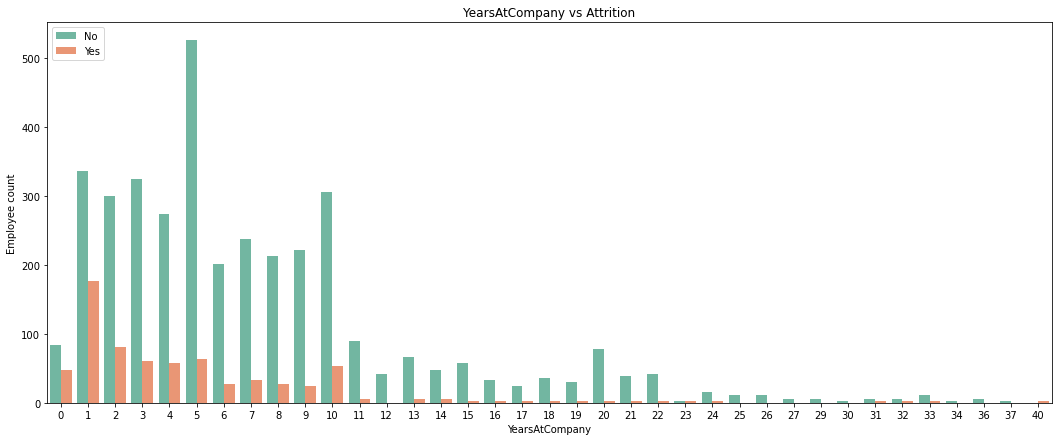

In [27]:
make_plot('YearsAtCompany')

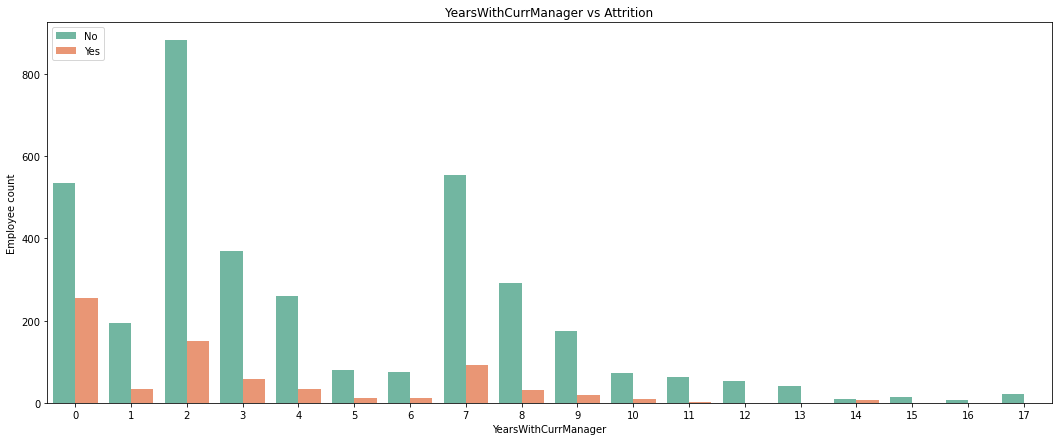

In [28]:
make_plot('YearsWithCurrManager')

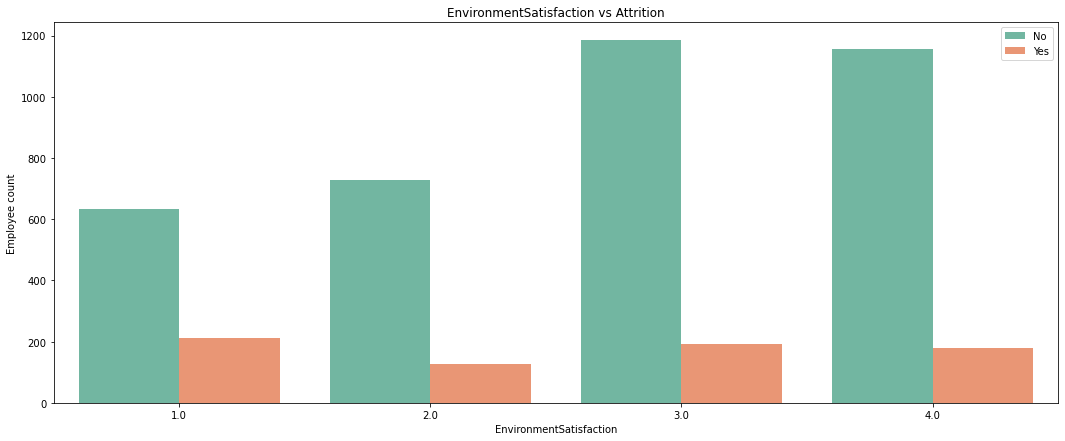

In [29]:
make_plot('EnvironmentSatisfaction')

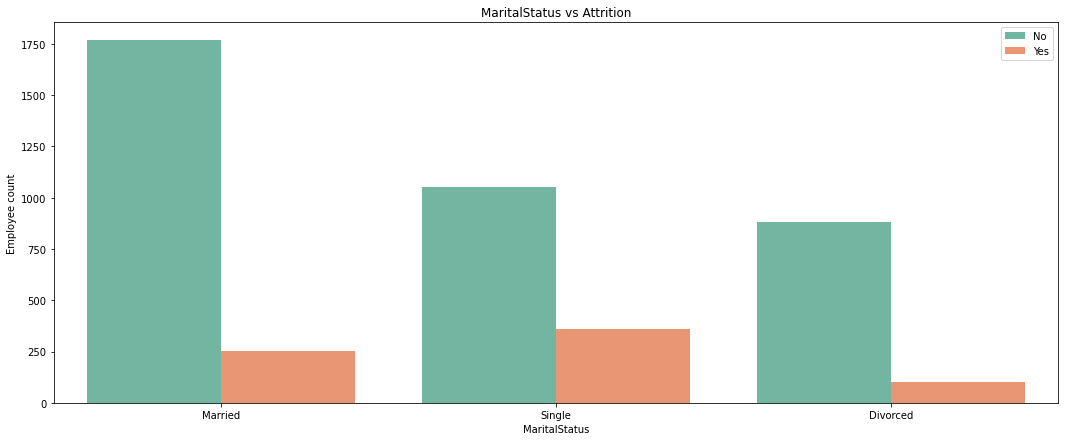

In [30]:
make_plot('MaritalStatus')

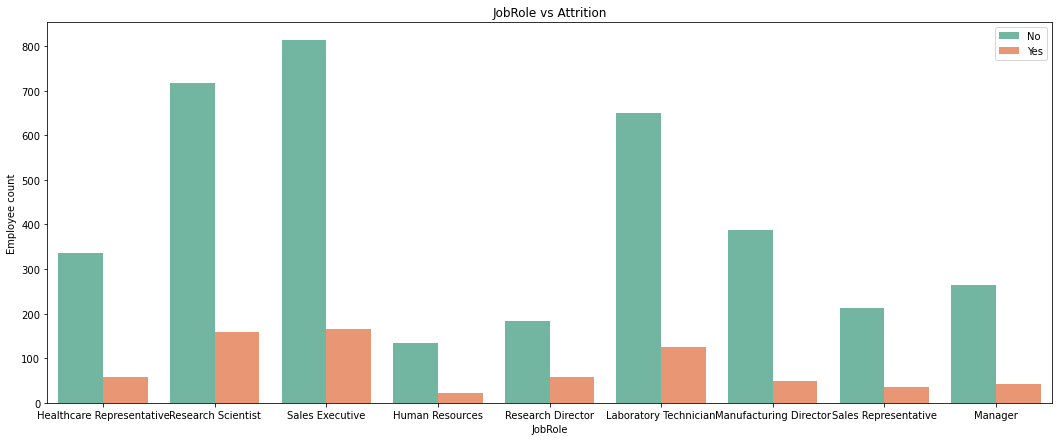

In [31]:
make_plot('JobRole')

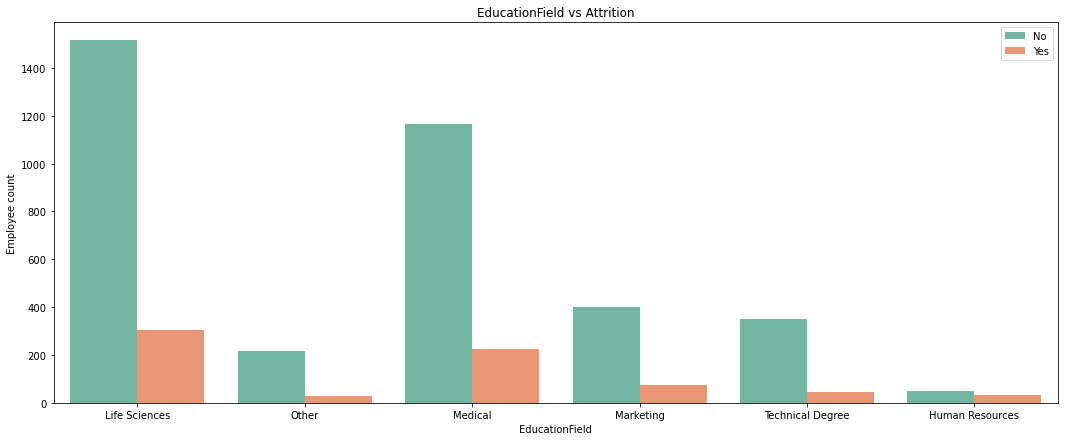

In [32]:
make_plot('EducationField')

In [33]:
# категориальные признаки переводим с помощью энкодера в числовые

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['Gender'] = le.fit_transform(df['Gender'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int32  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   int32  
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [34]:
# используем dummies для перевода признаков с категориями больше чем два в числовые

In [35]:
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 
                                               'JobRole', 'MaritalStatus'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   Attrition                          4410 non-null   int32  
 2   DistanceFromHome                   4410 non-null   int64  
 3   Education                          4410 non-null   int64  
 4   EmployeeCount                      4410 non-null   int64  
 5   EmployeeID                         4410 non-null   int64  
 6   Gender                             4410 non-null   int32  
 7   JobLevel                           4410 non-null   int64  
 8   MonthlyIncome                      4410 non-null   int64  
 9   NumCompaniesWorked                 4410 non-null   float64
 10  Over18                             4410 non-null   object 
 11  PercentSalaryHike                  4410 non-null   int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

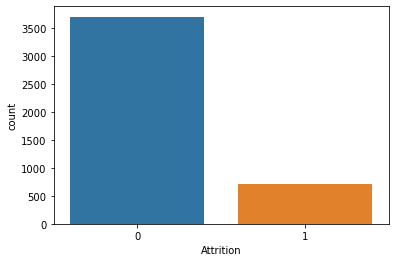

In [36]:
sns.countplot(x='Attrition', data=df)

In [37]:
len(df[df['Attrition']==1])/len(df)

# 16 процентов выгоревших сотрудников

0.16122448979591836

In [38]:
# удалим признаки ,которые постоянны по своему значению, а значит не оказывают никакого влияния 

df.drop(['EmployeeCount', 'StandardHours','Over18'], axis = 1, inplace = True)

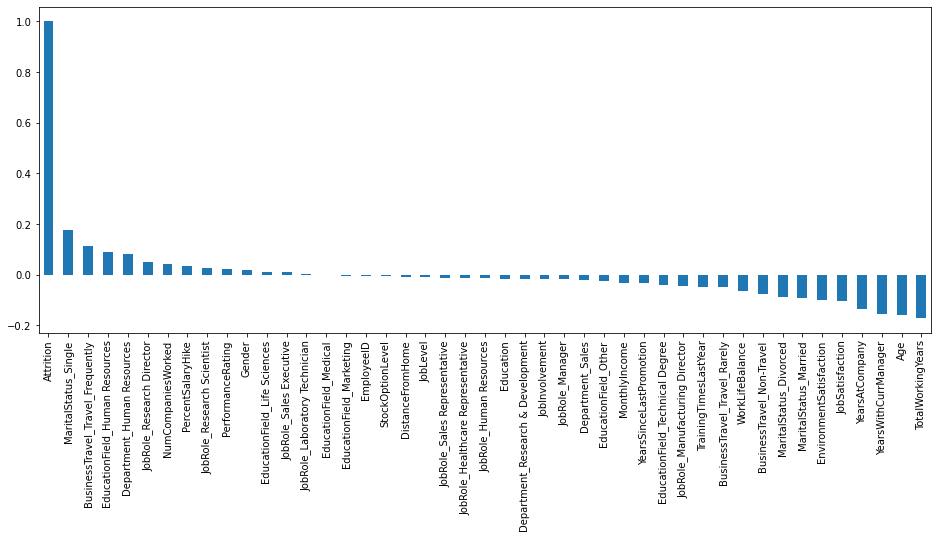

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
df.corr()['Attrition'].sort_values(ascending = False).plot(kind='bar');

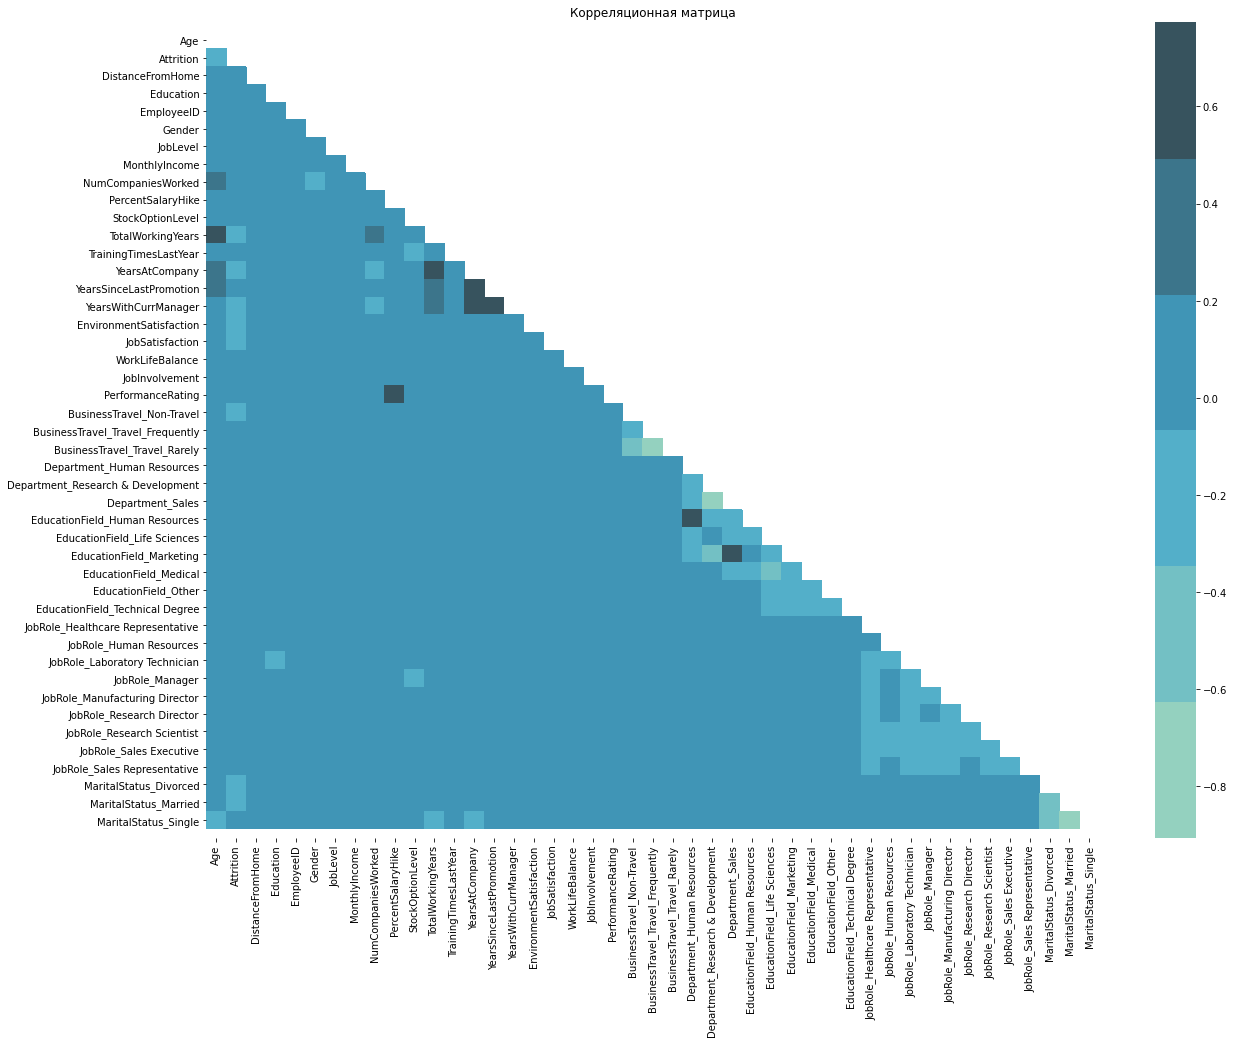

In [40]:
plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
ax = sns.heatmap(df.corr(), annot=False, cmap=sns.color_palette("GnBu_d"),
                mask=mask)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.title('Корреляционная матрица')
plt.show()

In [41]:
X = df[['Age','DistanceFromHome','Education','JobLevel','MonthlyIncome','NumCompaniesWorked',
              'PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
              'YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','EnvironmentSatisfaction','JobSatisfaction',
              'WorkLifeBalance','JobInvolvement','PerformanceRating', 'BusinessTravel_Non-Travel',
              'BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely','Department_Human Resources',
              'Department_Research & Development','Department_Sales','EducationField_Human Resources',
              'EducationField_Life Sciences','EducationField_Marketing','EducationField_Medical','EducationField_Other',
              'EducationField_Technical Degree','Gender','JobRole_Healthcare Representative',
              'JobRole_Human Resources','JobRole_Laboratory Technician','JobRole_Manager','JobRole_Manufacturing Director',
              'JobRole_Research Director','JobRole_Research Scientist','JobRole_Sales Executive','JobRole_Sales Representative',
              'MaritalStatus_Divorced','MaritalStatus_Married','MaritalStatus_Single']] #полный список колонок с данными для обучения]]


In [42]:

y = pd.Series(df['Attrition'] )

In [43]:
model = LogisticRegression(max_iter=1000)

In [44]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state = 20)
model.fit( X_train, y_train )

LogisticRegression(max_iter=1000)

In [45]:
print('Train score:',model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 0.8422416585681892
Test score: 0.8306878306878307


In [46]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [47]:
model = LogisticRegression(random_state=42)
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l1', 'l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01]

In [48]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train.append(X_test), y_train.append(y_test))
grid_result

C:\Users\ddns\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ddns\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ddns\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ddns\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ddns\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(random_state=42),
             n_jobs=-1,
             param_grid={'C': [1000, 100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [50]:
# summarizing results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.851096 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 1000, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 1000, 'penalty': 'l1', 'solver': 'lbfgs'}
0.850794 (0.007776) with: {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 1000, 'penalty': 'l1', 'solver': 'sag'}
0.838776 (0.000680) with: {'C': 1000, 'penalty': 'l1', 'solver': 'saga'}
0.851020 (0.007570) with: {'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
0.839002 (0.001756) with: {'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
0.838776 (0.000680) with: {'C': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
0.838776 (0.000680) with: {'C': 1000, 'penalty': 'l2', 'solver': 'sag'}
0.838776 (0.000680) with: {'C': 1000, 'penalty': 'l2', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.850642 (0.007893) with: {'

In [51]:
#деревья 
from sklearn.tree import DecisionTreeRegressor

In [52]:
clf =  DecisionTreeRegressor(max_depth=12, max_features=42)

In [53]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state = 20)

In [54]:
clf.fit(X, y)

DecisionTreeRegressor(max_depth=12, max_features=42)

In [55]:
clf.score(X_test, y_test)

0.8898416738565099

In [56]:
clf.score(X_train, y_train)

0.882719625872562